In [2]:
library(tidyverse)
library(R.matlab)

Warning message:
“package ‘tidyverse’ was built under R version 3.4.4”── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
Warning message:
“package ‘ggplot2’ was built under R version 3.4.4”Warning message:
“package ‘tibble’ was built under R version 3.4.4”Warning message:
“package ‘tidyr’ was built under R version 3.4.4”Warning message:
“package ‘readr’ was built under R version 3.4.4”Warning message:
“package ‘purrr’ was built under R version 3.4.4”Warning message:
“package ‘dplyr’ was built under R version 3.4.4”Warning message:
“package ‘stringr’ was built under R version 3.4.4”Warning message:
“package ‘forcats’ was built under R version 3.4.4”── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
R.matlab v3.

In [3]:
M <- readMat('/home/finc/Dropbox/Projects/LearningBrain/data/neuroimaging/multilayer_results_1/mean_modularity.mat')
F <- readMat('/home/finc/Dropbox/Projects/LearningBrain/data/neuroimaging/multilayer_results_1/mean_flexibility.mat')

mod <- as.data.frame(M$modularity)
flex <- as.data.frame(F$flex.mean)

colnames(mod)[1:4] <-  c('ses-1', 'ses-2', 'ses-3', 'ses-4')
colnames(flex)[1:4] <-  c('ses-1', 'ses-2', 'ses-3', 'ses-4')

mod$no <- c(1:46)
flex$no <- c(1:46)
head(mod)

ses-1,ses-2,ses-3,ses-4,no
0.1379863,0.1322191,0.1408463,0.1397007,1
0.1670645,0.1927007,0.2013947,0.2121386,2
0.1605756,0.1544445,0.1550126,0.1561242,3
0.1689090,0.2024497,0.2143913,0.2054830,4
0.1861898,0.1623821,0.2085313,0.1452740,5
0.2136213,0.1619341,0.1342291,0.1775958,6


In [4]:
Q <- mod %>% gather(key = "ses", value = "modularity", -no)
flex <- flex %>% gather(key = "ses", value = "flexibility", -no)

In [5]:
# Selecting subjects which finished the study

groups = read.csv('/home/finc/Dropbox/Projects/LearningBrain/github//LearningBrain_networks/data/behavioral/group_assignment.csv')
groups = na.omit(groups)
groups$no <- c(1:46)


head(groups)

,sub,group,no
1,sub-01,Control,1
2,sub-02,Control,2
4,sub-04,Control,3
5,sub-05,Experimental,4
6,sub-06,Experimental,5
7,sub-07,Experimental,6


In [6]:
modu <- left_join(groups, Q)
multilevel_measures <- left_join(modu, flex)
head(multilevel_measures)

Joining, by = "no"
Joining, by = c("no", "ses")


sub,group,no,ses,modularity,flexibility
sub-01,Control,1,ses-1,0.1379863,0.6469298
sub-01,Control,1,ses-2,0.1322191,0.6204147
sub-01,Control,1,ses-3,0.1408463,0.6224083
sub-01,Control,1,ses-4,0.1397007,0.6487241
sub-02,Control,2,ses-1,0.1670645,0.6477273
sub-02,Control,2,ses-2,0.1927007,0.6146332


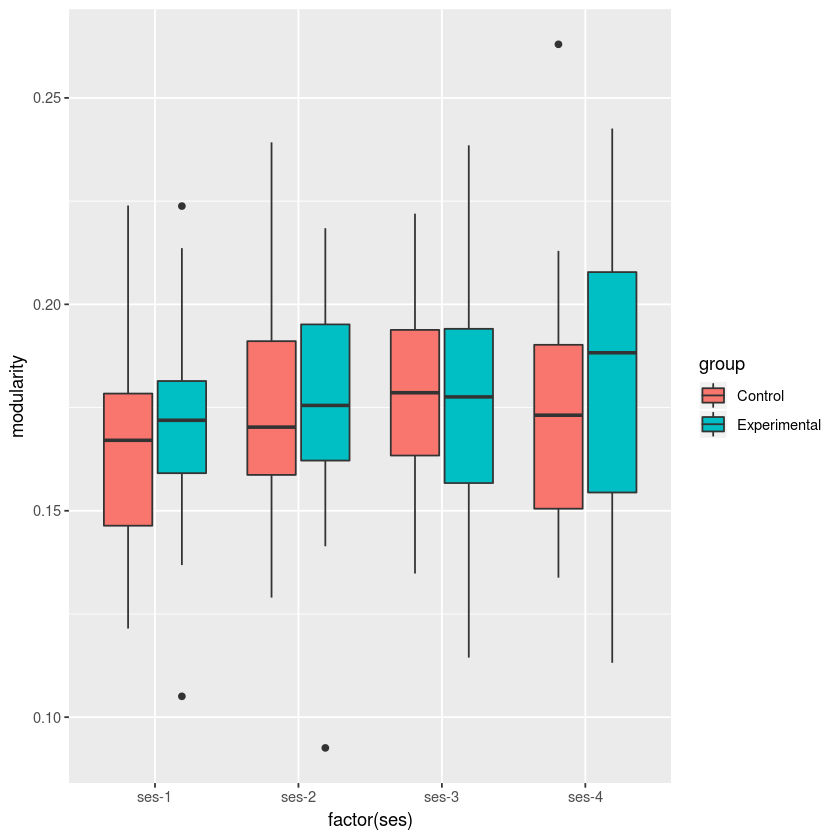

In [7]:
multilevel_measures %>% ggplot(aes(factor(ses), modularity, fill = group)) + geom_boxplot()

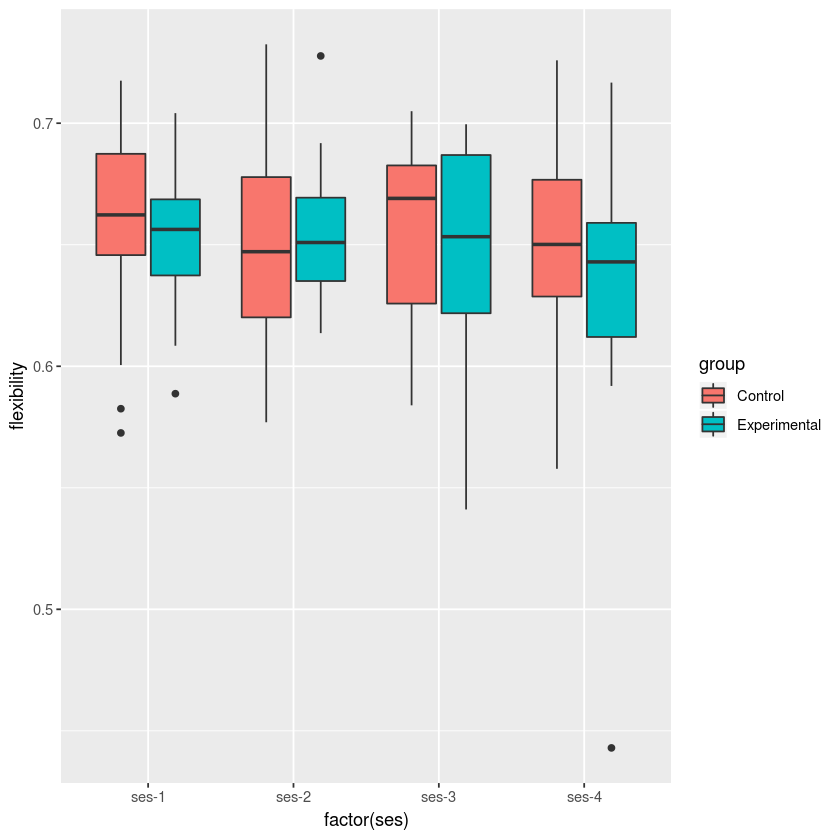

In [8]:
multilevel_measures %>% ggplot(aes(factor(ses), flexibility, fill = group)) + geom_boxplot()

In [10]:
# Writing training summary to a table
write.csv(multilevel_measures,  file = "/home/finc/Dropbox/Projects/LearningBrain/data/LB_multilayer_measures_method1.csv", row.names = FALSE)



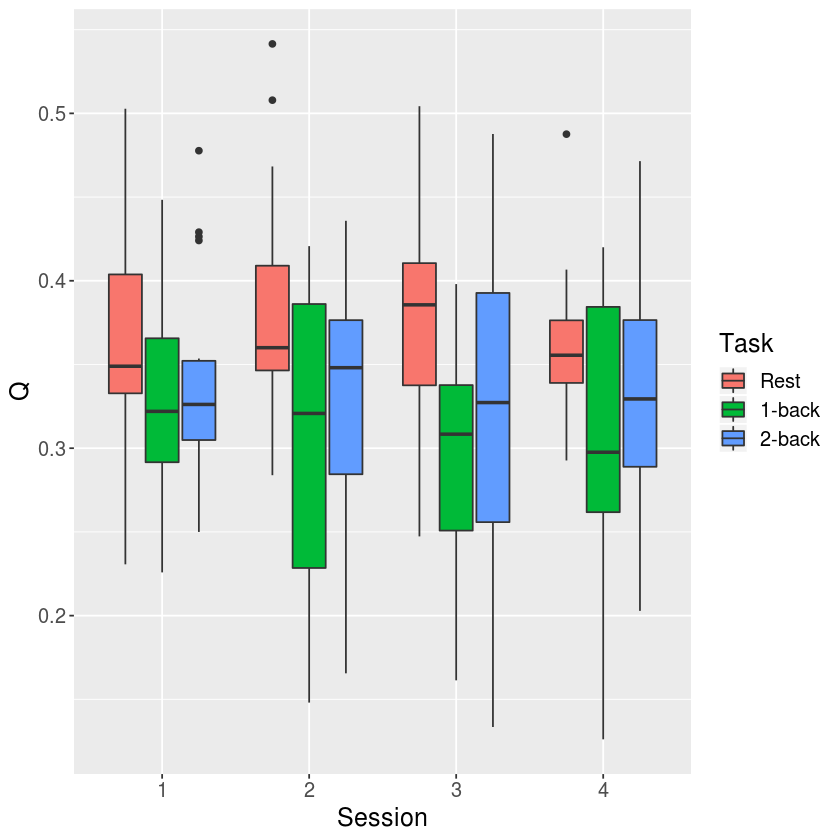

In [64]:
modu %>% 
    filter(!(sub %in% c('sub-13', 'sub-21', 'sub-23', 'sub-50', 'sub-20', 'sub-44'))) %>% 
    filter(group == 'Experimental') %>%
    #filter(task == '2') %>%
    ggplot(aes(Session, Q, fill = Task)) + geom_boxplot() + theme(text = element_text(size=15))



In [45]:
performance <- read.csv('/home/finc/Dropbox/Projects/LearningBrain/data/behavioral/LB_training_summary.csv')

In [46]:
all <- left_join(performance, modu)

Joining, by = "sub"
Warning message:
“Column `sub` joining factors with different levels, coercing to character vector”

In [47]:
x = all %>% filter(!(sub %in% c('sub-13', 'sub-21', 'sub-23', 'sub-50')))

In [48]:
head(all)

sub,nback_mean_estimate,nback_max_estimate,nback_baseline,nback_max_level,group,no,Session,Task,Q
sub-05,0.08441692,0.1186791,2.05,6,Experimental,4,1,Rest,0.4060722
sub-05,0.08441692,0.1186791,2.05,6,Experimental,4,1,1-back,0.3023393
sub-05,0.08441692,0.1186791,2.05,6,Experimental,4,1,2-back,0.3184947
sub-05,0.08441692,0.1186791,2.05,6,Experimental,4,2,Rest,0.5414914
sub-05,0.08441692,0.1186791,2.05,6,Experimental,4,2,1-back,0.3432512
sub-05,0.08441692,0.1186791,2.05,6,Experimental,4,2,2-back,0.3437559


In [111]:
B <- x %>% 
    filter(!(sub %in% c('sub-13', 'sub-21', 'sub-23', 'sub-50', 'sub-20', 'sub-44'))) %>% filter(group == 'Experimental') %>% filter(Task == "1-back") %>% filter(Session == 1)

In [110]:
cor.test(B$nback_mean_estimate, B$Q)


	Pearson's product-moment correlation

data:  B$nback_mean_estimate and B$Q
t = -1.7137, df = 18, p-value = 0.1037
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.70088762  0.08149794
sample estimates:
       cor 
-0.3745301 


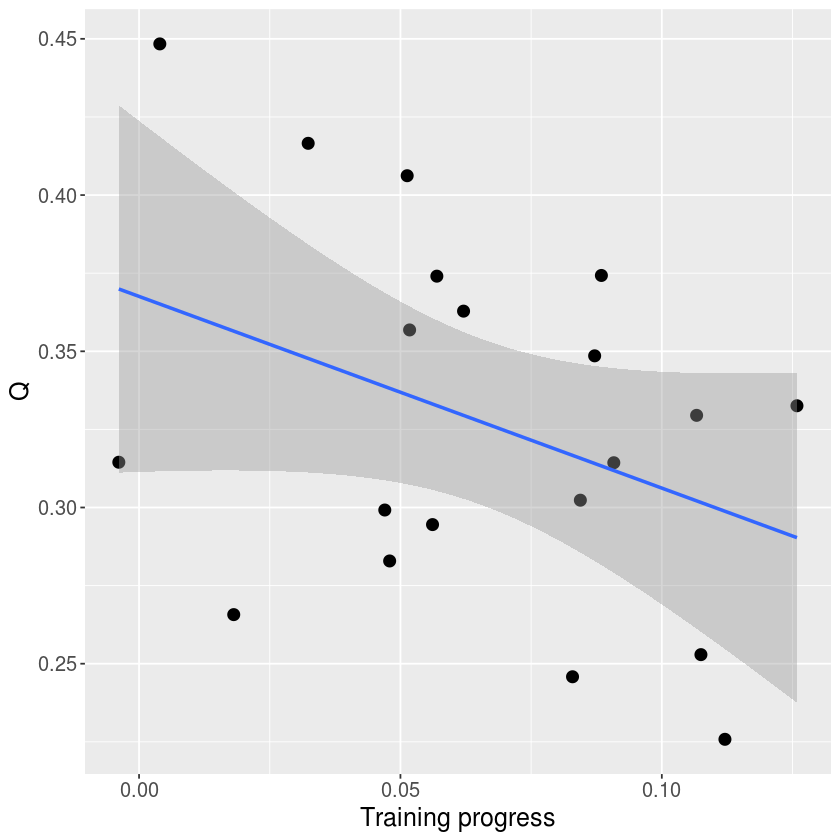

In [112]:
B %>% ggplot(aes(nback_mean_estimate, Q)) + geom_point(size = 3) + geom_smooth(method = 'lm') + xlab("Training progress")   + theme(text = element_text(size=15))

In [115]:
fmri_performance <- read.csv('/home/finc/Dropbox/Projects/LearningBrain/data/behavioral/LB_')
levels(fmri_performance$modality)

[1] "audio"   "spatial"

In [146]:
mod_conn <- read.csv('/home/finc/Dropbox/Projects/LearningBrain/data/behavioral/modularity_from_matlab.csv', header = FALSE)
groups = read.csv('/home/finc/Dropbox/Projects/LearningBrain/github//LearningBrain_networks/data/behavioral/group_assignment.csv')

names(mod_conn) <- c("no", "Session", "Task", "Q")
mod_conn$Task <- factor(mod_conn$Task, labels = c("1-back", "2-back"))
mod_conn$Session <- as.factor(mod_conn$Session)

In [143]:
groups

sub,group
sub-01,Control
sub-02,Control
sub-03,NA
sub-04,Control
sub-05,Experimental
sub-06,Experimental
sub-07,Experimental
sub-08,Control
sub-09,NA
sub-10,Control


In [156]:
groups$no <- c(1:53)

Q <- left_join(groups, mod_conn)

Joining, by = "no"


Warning message:
“Removed 17 rows containing non-finite values (stat_boxplot).”

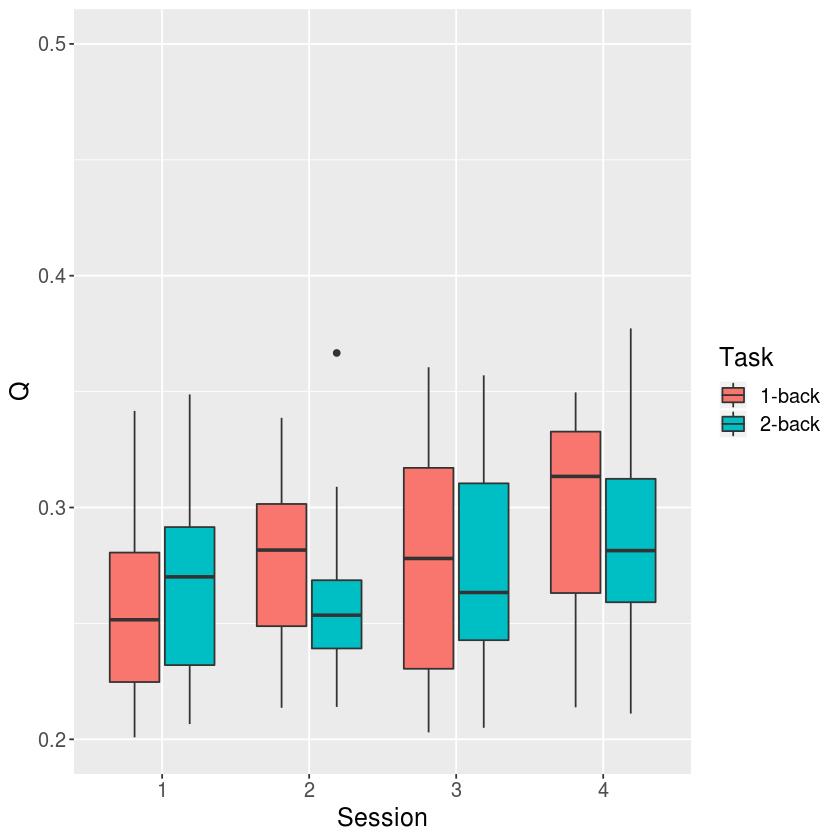

In [157]:
Q %>% 
    filter(!(sub %in% c('sub-13', 'sub-21', 'sub-23', 'sub-50', 'sub-20', 'sub-44'))) %>% 
    filter(group == 'Experimental') %>%
    #filter(task == '2') %>%
    ggplot(aes(Session, Q, fill = Task)) + geom_boxplot() + theme(text = element_text(size=15)) + ylim(0.2, 0.5)